# 3.1 비지도 학습의 종류
1. 비지도 변환 (Unsupervised Transformation)
    - 데이터를 새롭게 표현하여 사람이나 다른 머신러닝 알고리즘이 원래 데이터보다 쉽게 해석할 수 있도록 만드는 알고리즘
    - 특성이 많은 고차원 데이터를 특성의 수를 줄이면서 꼭 필요한 특징을 포함한 데이터로 표현하는 방법 > 차원 축소 (Dimensionality reduction)
    - 데이터를 구성하는 단위나 성분을 찾기도 한다. (예. 많은 텍스트 문서에서 주제 추출하기)
2. 군집 (Clustering)
    - 데이터를 비슷한 것끼리 그룹으로 묶는 것

# 3.2 비지도 학습의 도전 과제
- 보통 레이블이 없는 데이터에 적용하기 때문에 무엇이 올바른 출력인지 모른다.
- 알고리즘에게 우리가 원하는 것을 알려줄 방법이 없다.
- 비지도 학습의 결과를 평가하기 위해서는 직접 확인하는 것이 유일한 방법일 때가 많다. 

    + 따라서 비지도 학습 알고리즘은 탐색적 분석 단계와 지도 학습의 전처리 단계에서 사용한다. 
    + 비지도 학습의 결과로 새롭게 표현된 데이터를 사용해 학습하면 지도 학습의 정확도가 좋아지기도 하며 메모리와 시간을 절약할 수 있다. 

# 3.3 데이터 전처리와 스케일 조정

In [1]:
import mglearn
import warnings
warnings.filterwarnings(action='ignore')

C:\Anaconda\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


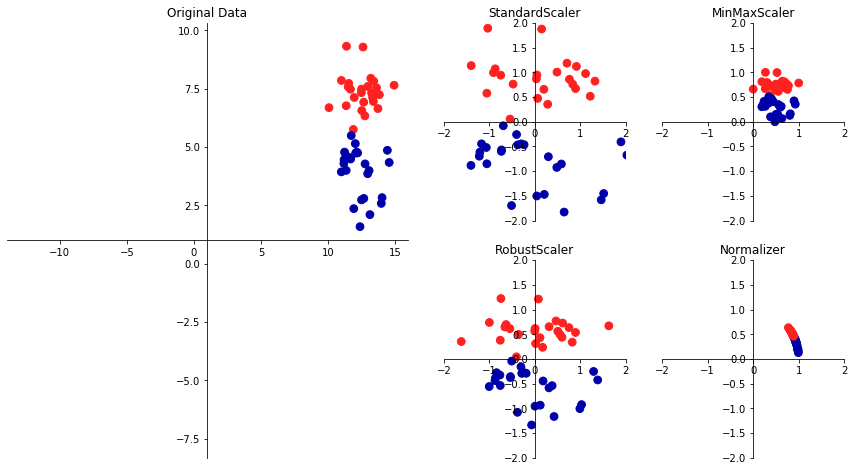

In [2]:
mglearn.plots.plot_scaling()

# 3.3.1 여러 가지 전처리 방법

###### - StandardScaler
<img src=./img/standardscaler.png width=200 style = float:left>

###### - RobustScaler
평균과 분산 대신 중간 값과 사분위 값을 사용하여 전체 데이터와 아주 동떨어진 데이터 포인트(이상치 outlier)에 영향을 받지 않는다. 

<img src=./img/robustscaler.png width=100 style = float:left>

###### - MinMaxScaler
<img src=./img/minmaxscaler.png width=250 style = float:left>

###### - Normalizer
Normalizer의 Norm 매개변수는 l1, l2, max 세 가지 옵션을 제공하며 유클리디안 거리를 의미하는 l2가 기본값이다.

StandardScaler, RobustScaler, MinMaxScaler는 각 열(특성)의 통계치를 이용하지만 Normalizer는 행(데이터 포인트)마다 각기 정규화 된다.

특성 벡터의 유클리디안 길이가 1이 되도록 데이터 포인트를 조정한다. 

다른 말로 하면 지름이 1인 원(3차원일 땐 구)에 데이터 포인트를 투영한다. 

곧 각 데이터 포인트가 다른 비율로(길이에 반비례하여) 스케일이 조정된다는 뜻이다.

이는 특성 벡터의 길이는 상관없고 데이터의 방향(또는 각도)만이 중요할 때 많이 사용된다.

# 3.3.2 데이터 변환 적용하기 

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [5]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [6]:
X_train_scaled = scaler.transform(X_train)

#MinMaxScaler로 스케일이 조정된 후 데이터셋의 속성을 출력
print('Shape After Scaling: ', X_train_scaled.shape)
print('Min of features before scaling:\n', X_train.min(axis=0))
print()
print('Max of features before scaling:\n', X_train.max(axis=0))
print()
print()
print('Min of features after scaling:\n', X_train_scaled.min(axis=0))
print()
print('Max of features after scaling:\n', X_train_scaled.max(axis=0))

Shape After Scaling:  (426, 30)
Min of features before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]

Max of features before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]


Min of features after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]

Max of features after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [7]:
X_test_scaled = scaler.transform(X_test)

print('Min of features after scaling:\n', X_test_scaled.min(axis=0))
print()
print('Max of features after scaling:\n', X_test_scaled.max(axis=0))

Min of features after scaling:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]

Max of features after scaling:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


transform 매서드는 테스트 세트의 최솟값과 범위를 사용하지 않고, 항상 훈련 세트의 최솟값을 빼고 훈련 세트의 범위로 나눈다.

# 3.3.4 훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정하기

지도 학습 모델에서 테스트 세트를 사용하려면 훈련 세트와 테스트 세트에 같은 변환을 적용해야 한다는 점이 중요하다.

이와 반대로, 테스트 세트의 최솟값과 범위를 사용하면 어떤 일이 일어나는지 확인해보자.

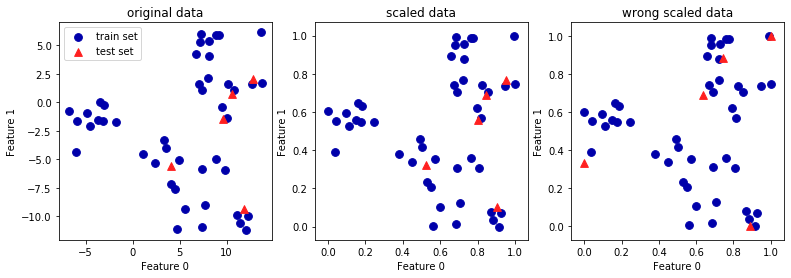

In [8]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

#인위적인 데이터셋 생성
X, _ = make_blobs(n_samples=50, centers =5, random_state =4, cluster_std = 2)

X_train, X_test = train_test_split(X, random_state=5, test_size =.1)

#훈련 세트와 테스트 세트의 산점도를 그린다. 맨 왼쪽 그림
fig, axes = plt.subplots(1,3, figsize=(13,4))
axes[0].scatter(X_train[:,0], X_train[:,1], c=mglearn.cm2.colors[0], label='train set', s=60)
axes[0].scatter(X_test[:,0], X_test[:,1], marker='^', c=mglearn.cm2.colors[1], label='test set', s=60)
axes[0].legend(loc='upper left')
axes[0].set_title('original data')

#MinMaxScaler를 사용해 스케일을 조정한다. (원래 하는 방식)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#스케일이 조정된 데이터의 산점도를 그린다. 중간 그림
axes[1].scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=mglearn.cm2.colors[0], label='train set', s=60)
axes[1].scatter(X_test_scaled[:,0], X_test_scaled[:,1], marker='^', c=mglearn.cm2.colors[1], label='test set', s=60)
axes[1].set_title('scaled data')

#테스트 세트의 스케일을 따로 조정했을 때 어떤일이 일어나는지 확인해보자.
##테스트 세트의 최솟값은 0, 최댓값은 1이 된다. 확인을 위한 것으로 실제로는 절대 이렇게 사용해서는 안된다.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

#잘못 조정된 데이터의 산점도를 그린다. 오른쪽 그림
axes[2].scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=mglearn.cm2.colors[0], label='train set', s=60)
axes[2].scatter(X_test_scaled_badly[:,0], X_test_scaled_badly[:,1], marker='^', c=mglearn.cm2.colors[1], label='test set', s=60)
axes[2].set_title('wrong scaled data')

for ax in axes:
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')

# 3.3.5 지도 학습에서 데이터 전처리 효과

cancer 데이터셋에서 SVC를 학습시킬 때 MinMaxScaler 효과를 확인해보자

In [9]:
# 비교를 위해 원본 데이터로 SVC 모델을 만든다. (Scaling 작업 없음)
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm=SVC(C=100)
svm.fit(X_train, y_train)

print('Test Acc: {:.2f}'.format(svm.score(X_test, y_test)))

Test Acc: 0.63


In [10]:
# MinMaxSclaer 사용
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

print('Test Acc after MinMaxScaling: {:.2f}'.format(svm.score(X_test_scaled, y_test)))

Test Acc after MinMaxScaling: 0.97


In [11]:
# StandardScaler 사용. 평균 0, 분산 1을 갖도록 조정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

print('Test Acc after StandardScaling: {:.2f}'.format(svm.score(X_test_scaled, y_test)))

Test Acc after StandardScaling: 0.96


# 3.4 차원 축소, 특성 추출, 매니폴드 학습

# 3.4.1 주성분 분석 (PCA)

특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전시키는 기술.

회전한 뒤에 데이터를 설명하는 데 얼마나 중요하냐에 따라 종종 새로운 특성 중 일부만 선택된다.

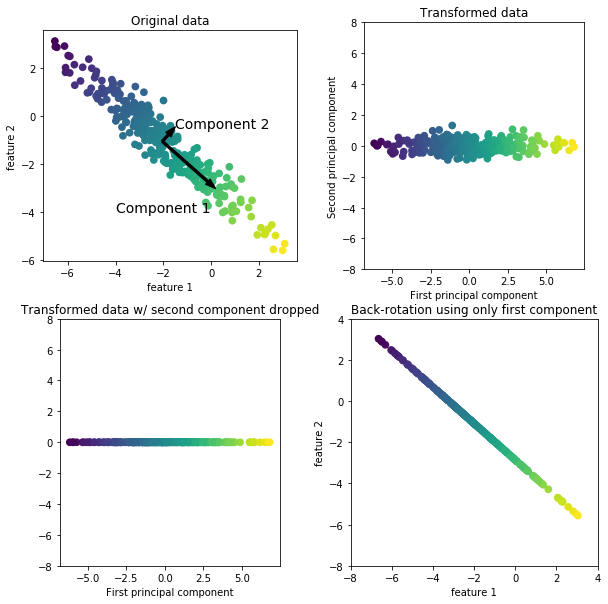

In [12]:
mglearn.plots.plot_pca_illustration()

###### 첫 번째 그래프
첫 번째 그래프는 원본 데이터 포인트를 색으로 구분해 표시한 것이다.

이 알고리즘은 먼저 '성분 1'이라고 쓰여 있는, 분산이 가장 큰 방향(오른쪽 아래 또는 왼쪽 위)를 찾는다.

이 방향(또는 벡터)이 데이터에서 가장 많은 정보를 담고 있는 방향이다. 다른 말로, 특성들의 상관관계가 가장 큰 방향이다.

그 다음으로, 첫 번째 방향과 직각인 방향 중에서 가장 많은 정보를 담은 방향을 찾는다.

2차원에서는 가능한 직각 방향이 하나뿐이지만 고차원에서는 많은 직각 방향이 있을 수 있다.

이런 과정을 거쳐 찾은 방향을 데이터에 있는 주된 분산의 방향이라고 해서 '주성분' 이라고 한다.

일반적으로 원본 특성 개수만큼의 주성분이 있다.

###### 두 번째 그래프
두 번째 그래프는 주성분 1과 2를 각각 x축과 y축에 나란하도록 회전한 것이다. 

회전하기 전에 데이터에서 평균을 빼서 중심을 원점에 맞추었다. PCA에 의해 회전된 두 축은 연관되어 있지 않으므로 변환된 데이터의 상관관계 행렬이 대각선 방향을 제외하고는 0이 된다. 

###### 세 번째 그래프
PCA는 주성분의 일부만 남기는 차원 축소 용도로 사용할 수 있다.

세 번째 그래프에서는 첫 번째 주성분만 유지하려고 한다.

이렇게 하면 2차원 데이터셋이 1차원 데이터셋으로 차원이 감소한다.

단순히 원본 특성 중 하나만 남기는 것은 아니다. 가장 유용한 방향을 찾아서 그 방향의 성분, 즉 첫 번째 주성분을 유지하는 것이다.

###### 네 번째 그래프
마지막으로 데이터에 다시 평균을 더하고 반대로 회전시킨다.

이 데이터 포인트들은 원래 특성 공간에 놓여 있지만 첫 번째 주성분의 정보만 담고 있다.이 변환은 데이터에서 노이즈를 제거하거나 주성분에서 유지되는 정보를 시각화하는 데 종종 사용한다.

## 유방암 데이터셋 PCA 적용 후 시각화

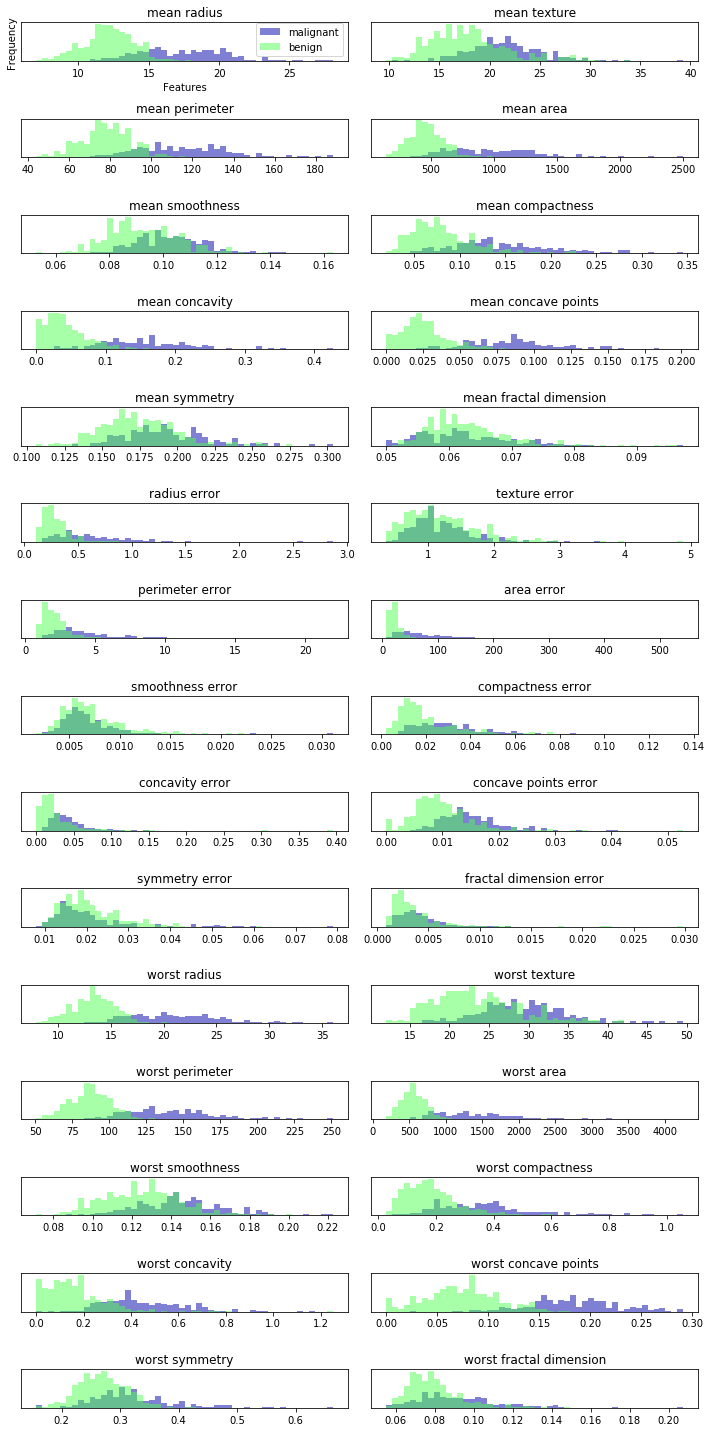

In [13]:
import numpy as np
fig, axes = plt.subplots(15, 2, figsize=(10,20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins = 50)
    ax[i].hist(malignant[:, i], bins = bins, color = mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins = bins, color = mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel('Features')
ax[0].set_ylabel('Frequency')
ax[0].legend(['malignant', 'benign'], loc='best')
fig.tight_layout()

위 그림은 각 특성에 대한 히스토그램으로 특정 간격에 얼마나 많은 데이터 포인트가 나타나는지 횟수를 센 것이다.

이를 통해 어떤 특성이 양성과 악성 샘플을 구분하는 데 더 좋은지 가늠해 볼 수 있다.

예를 들어 'smoothness error' 특성은 두 히스토그램이 거의 겹쳐저 별로 쓸모가 없다. 하지만 'worst concave points'는 두 히스토그램이 확실히 구분되어 매우 유용한 특성이다.

그러나 이 그래프는 특성 간의 상호작용이나 이 상호작용이 클래스와 어떤 관련이 있는지는 전혀 알려주지 못한다.

PCA를 사용하면 주요 상호작용을 찾아낼 수 있어 더 나은 그림을 만들 수 있다.

처음 두 개의 주성분을 찾아 2차원 공간에 하나의 산점도로 데이터를 시각화 해보자.

In [14]:
#PCA 전 StandardScaler를 사용해 각 특성의 분산이 1이 되도록 스케일 조정
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

- PCA 변환 순서
    1. PCA 객체 생성 
    2. fit 매서드 호출해 주성분 찾기
    3. transform 매서드 호출해 데이터 회전시키고 차원 축소
    
기본값일 때 PCA는 데이터를 회전(그리고 이동)만 시키고 모든 주성분을 유지한다.

데이터의 차원을 줄이려면 PCA 객체를 만들 때 얼마나 많은 성분을 유지할지 알려줘야 한다.

In [15]:
from sklearn.decomposition import PCA

#데이터의 처음 두 개 주성분만 유지시킨다.
pca = PCA(n_components=2)

pca.fit(X_scaled)

#처음 두 개의 주성분을 사용해 데이터를 변환
X_pca = pca.transform(X_scaled)

print('original data shape: ', str(X_scaled.shape))
print('data shape after PCA: ', str(X_pca.shape))

original data shape:  (569, 30)
data shape after PCA:  (569, 2)


Text(0, 0.5, 'Second principal component')

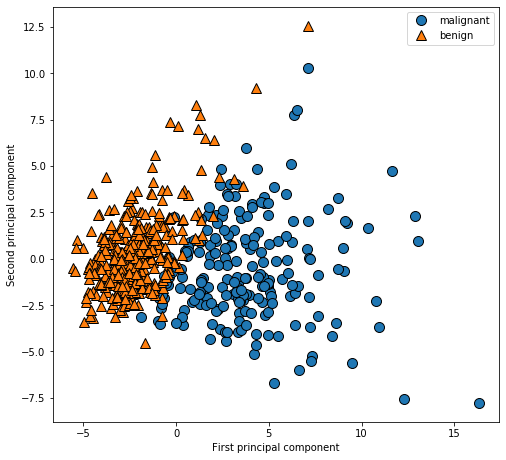

In [16]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:,1], cancer.target)
plt.legend(['malignant', 'benign'], loc='best')

plt.gca().set_aspect('equal')
plt.xlabel('First principal component') #첫 번째 주성분
plt.ylabel('Second principal component')

PCA는 비지도 학습이므로 회전축을 찾을 때 어떤 클래스 정보도 사용하지 않고 단순히 데이터에 있는 상관관계만을 고려한다.

이 산점도는 첫 번째 주성분과 두 번째 주성분을 사용해 만들었고 클래스 정보를 이용해 포인트 모양을 구분하였다.

두 클래스가 2차원 공간에서 꽤 잘 구분되는 것을 볼 수 있다.

PCA의 단점은 그래프의 두 축을 해석하기가 쉽지 않다는 점이다. 주성분은 원본 데이터에 있는 어떤 방향에 대응하는 여러 특성이 조합된 형태인데 이런 조합이 보통 매우 복잡하다. 

In [17]:
#PCA 객체가 학습될 때 components_ 속성에 주성분이 저장된다. 
##각 행은 주성분 하나씩을 나타내며 중요도에 따라 정렬되어 있다.
###열은 원본 데이터의 특성에 대응하는 값
print('PCA principal components shape: ', pca.components_.shape)

PCA principal components shape:  (2, 30)


In [18]:
print('PCA principal components', pca.components_)

PCA principal components [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal components')

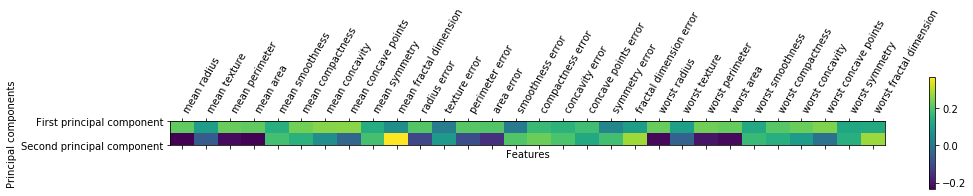

In [19]:
#히트맵으로 시각화
plt.matshow(pca.components_, cmap = 'viridis')
plt.yticks([0,1], ['First principal component', 'Second principal component'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
          cancer.feature_names, rotation=60, ha='left')

plt.xlabel('Features')
plt.ylabel('Principal components')

첫 번째 주성분의 모든 특성은 부호가 같다. (모두 양수이지만, 주성분의 화살표 방향은 의미가 없다)

이 말은 모든 특성 사이에 공통의 상호관계가 있다는 뜻이다. 따라서 한 특성의 값이 커지면 다른 값들도 같이 높아질 것이다.

두 번째 주성분은 부호가 섞여 있고 두 주성분 모두 30개의 특성이 있다. 

모든 특성이 섞여 있기 때문이 히트맵의 축이 가지는 의미를 설며하기가 쉽지 않다.

## 고유얼굴 (eigenface) 특성 추출

PCA는 특성 추출에도 이용한다. 특성 추출은 원본 데이터 표현보다 분석하기에 더 적합한 표현을 찾을 수 있으리란 생각에서 출발한다.

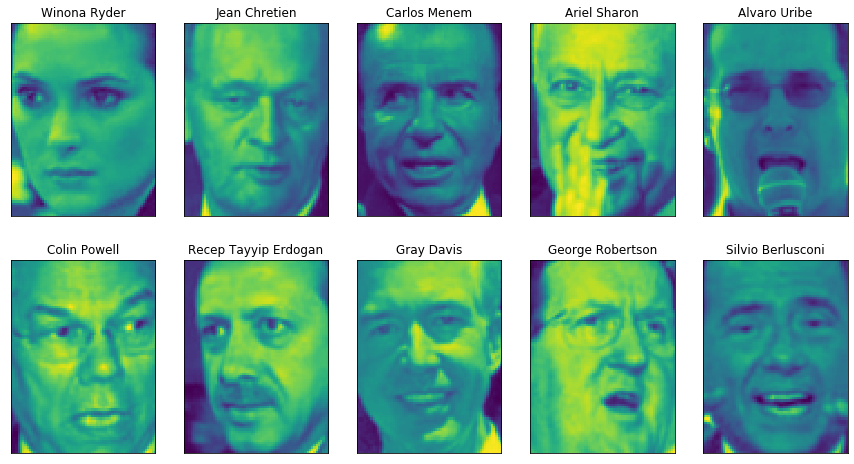

In [20]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person = 20, resize =0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15,8),
                        subplot_kw = {'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

#LFW 데이터셋에는 62명의 얼굴을 찍은 이미지가 총 3023개 있으며 각 이미지의 크기는 87*65 픽셀이다. 

In [21]:
print('people.images.shape: ', people.images.shape)
print('Number of Class: ', len(people.target_names))

people.images.shape:  (3023, 87, 65)
Number of Class:  62


In [22]:
#데이터가 편중되지 않았는지 각 타깃이 나타난 횟수 계산
counts = np.bincount(people.target)

for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='      ')
    if (i+1) % 3 == 0 :
        print()

#데이터셋의 타깃별로 그 숫자가 편중되어 있다.

Alejandro Toledo           39      Alvaro Uribe               35      Amelie Mauresmo            21      
Andre Agassi               36      Angelina Jolie             20      Ariel Sharon               77      
Arnold Schwarzenegger      42      Atal Bihari Vajpayee       24      Bill Clinton               29      
Carlos Menem               21      Colin Powell              236      David Beckham              31      
Donald Rumsfeld           121      George Robertson           22      George W Bush             530      
Gerhard Schroeder         109      Gloria Macapagal Arroyo    44      Gray Davis                 26      
Guillermo Coria            30      Hamid Karzai               22      Hans Blix                  39      
Hugo Chavez                71      Igor Ivanov                20      Jack Straw                 28      
Jacques Chirac             52      Jean Chretien              55      Jennifer Aniston           21      
Jennifer Capriati          42      Jennifer Lo

In [24]:
#타깃마다 50개의 이미지만 선택하자.
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

#0~255 사이의 흑백 이미지의 픽셀 값을 0~1 스케일로 조정한다.
X_peple = X_people/255.

In [26]:
#최근접 이웃 분류기를 사용해서 분류를 해보자
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, 
                                                    stratify = y_people, random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print('1-neighbors classifier test score : {:.2f}'.format(knn.score(X_test, y_test)))

1-neighbors classifier test score : 0.23


score를 더 높이기 위해서는 PCA가 필요하다.

얼굴의 유사도를 측정하기 위해 원본 픽셀 공간에서 거리를 계산하는 것은 매우 나쁜 방법이다.

픽셀을 사용해서 두 이미지를 비교할 때, 각 픽셀의 회색톤 값을 다른 이미지에서 동일한 위치에 있는 픽셀 값과 비교한다.

이런 방식은 사람이 얼굴 이미지를 인식하는 것과 많이 다르고, 픽셀을 있는 그대로 비교하는 방식으로는 얼굴의 특징을 잡아내기가 어렵다. 

여기서는 PCA의 화이트닝(whitening) 옵션을 사용해 주성분의 스케일이 같아지도록 조정한다.

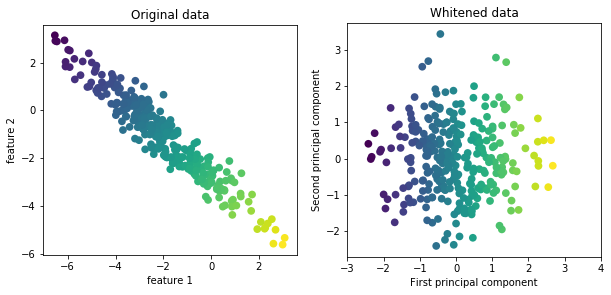

In [27]:
mglearn.plots.plot_pca_whitening()

In [32]:
#PCA 객체를 훈련 데이터로 학습시켜 처음 100개의 주성분을 추출하자.
## 그 후 훈련 데이터와 테스트 데이터를 변환한다.

pca = PCA(n_components = 100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print('X_train_pca.shape: ', X_train_pca.shape)

X_train_pca.shape:  (1547, 100)


In [33]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)

print('Test Acc: {:.2f}'.format(knn.score(X_test_pca, y_test)))

Test Acc: 0.31


주성분이 나타내는 것은 입력 데이터 공간에서의 어떤 방향이다.

입력 차원은 87\*65 픽셀의 흑백 이미지이고, 따라서 이 공간의 어떤 방향도 87\*65 픽셀의 흑백 이미지

In [34]:
# 몇 개의 주성분을 확인해보자
print('pca.components_.shape', pca.components_.shape)

pca.components_.shape (100, 5655)


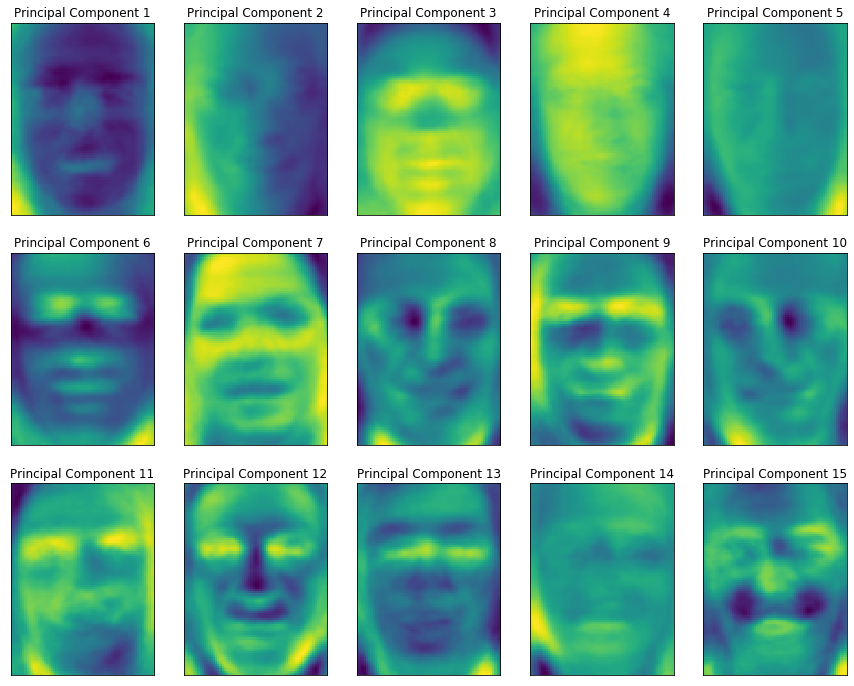

In [38]:
fig, axes = plt.subplots(3,5, figsize=(15,12),
                        subplot_kw = {'xticks':(), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap = 'viridis')
    ax.set_title('Principal Component {}'.format(i+1))

몇몇 주성분이 잡아낸 얼굴 이미지의 특징을 짐작해볼 수 있다. (얼굴과 배경의 명암 차이 등)

이 PCA 모델은 픽셀을 기반으로 하므로, 눈, 코의 위치 같은 얼굴의 배치와 조명이 두 이미지가 얼마나 비슷한지 판단하는 데 큰 영향을 준다.

하지만 사람이 인식을 할 때에는 이를 통해 인지하지 않는다. 알고리즘이 데이터를 해석하는 방식은 사람의 방식과는 상당히 다르다.

Text(0, 0.5, 'Second Principal component')

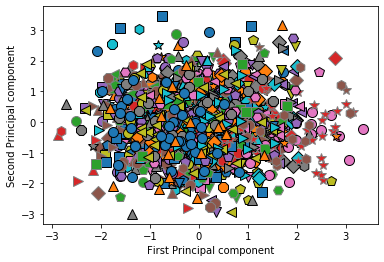

In [40]:
# PCA의 처음 두 주성분을 이용해 전체 데이터를 누구의 얼굴인지 클래스로 구분해 산점도로 나타내보자.
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:,1], y_train)
plt.xlabel('First Principal component')
plt.ylabel('Second Principal component')

## 주성분을 두 개만 사용했을 땐 전체 데이터가 한 덩어리로 뭉쳐 있어 클래스가 잘 구분되지 않는다. 

# 3.4.2 비음수 행렬 분해(Non-negative Matrix Factorization, NMF)
유용한 특성을 뽑아내기 위한 또 다른 비지도 학습 알고리즘

PCA처럼 어떤 성분의 가중치 합으로 각 데잍 포인트를 나타낼 수 있다.

하지만 PCA에서는 데이터의 분산이 가장 크고 수직인 성분을 찾았다면 NMF에서는 음수가 아닌 성분과 계수 값을 찾는다. 즉, 주성분과 계수가 모두 0보다 크거나 같아야 한다.

음수가 아닌 주성분과 계수의 가중치 합은 음수가 되지 않으므로 당연하게 이 방식은 음수가 아닌 특성을 가진 데이터에만 적용할 수 있다. 

이러한 기능은 여러 사람의 목소리가 담긴 오디오 트랙이나 여러 악기로 이뤄진 음악처럼 독립된 소스를 추가하여 만들어진 데이터에 특히 유용하다. 이럴 때 NMF는 섞여 있는 데이터에서 원본 성분을 구분할 수 있다.

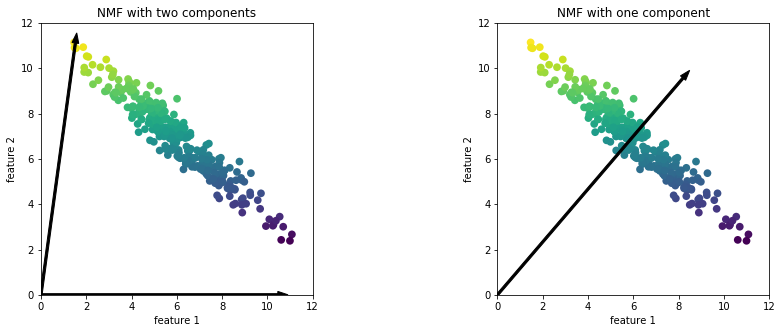

In [42]:
#인위적 데이터에 NMF 적용하기
mglearn.plots.plot_nmf_illustration()

In [44]:
#NMF는 데이터를 인코딩하거나 재구성하는 용도로 사용하기보다는 주로 데이터에 있는 유용한 패턴을 찾는 데 활용한다.
##먼저 성분 15개만 추출해보자
'''
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig,axes = plt.subplots(3,5, figsize = (15,12),
                       subplot_kw = {'xticks':(), 'yticks':()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel(()))):
    ax.imshow(component.reshape(image_shape))
    ax.set_title('Component {}'.format(i))
    '''

"\nfrom sklearn.decomposition import NMF\nnmf = NMF(n_components=15, random_state=0)\nnmf.fit(X_train)\nX_train_nmf = nmf.transform(X_train)\nX_test_nmf = nmf.transform(X_test)\n\nfig,axes = plt.subplots(3,5, figsize = (15,12),\n                       subplot_kw = {'xticks':(), 'yticks':()})\nfor i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel(()))):\n    ax.imshow(component.reshape(image_shape))\n    ax.set_title('Component {}'.format(i))\n    "

Text(0, 0.5, 'Signal')

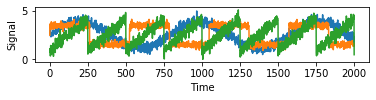

In [45]:
#덧붙이는 구조를 가진 인위적인 데이터셋으로 자세히 살표보자
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S, '-')
plt.xlabel('Time')
plt.ylabel('Signal')

In [46]:
#원본 데이터를 사용해 100개의 측정 데이터를 만든다.
A = np.random.RandomState(0).uniform(size=(100,3))
X = np.dot(S, A.T)
print('Data Shape: ', X.shape)

Data Shape:  (2000, 100)


In [48]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print('signal data shape: ', S_.shape)

signal data shape:  (2000, 3)


# 3.5 군집 (Clustering)
한 클러스터 안의 데이터 포인트끼리는 매우 비슷하고 다른 클러스터의 데이터 포인트와는 구분되도록 데이터를 나누는 것이 목표.

# 3.5.1 K-평균 군집 (K-Means)
이 알고리즘은 데이터의 어떤 영역을 대표하는 클러스터 중심(cluster center)을 찾는다.

알고리즘은
1. 데이터 포인트를 가장 가까운 중심에 할당하고
2. 그런 다음 클러스터에 할당된 데이터 포인트의 평균을 구한다.
3. 클러스터 중심을 다시 지정한다.
4. 클러스터에 할당되는 데이터 포인트에 변화가 없을 때 알고리즘이 종료된다. 

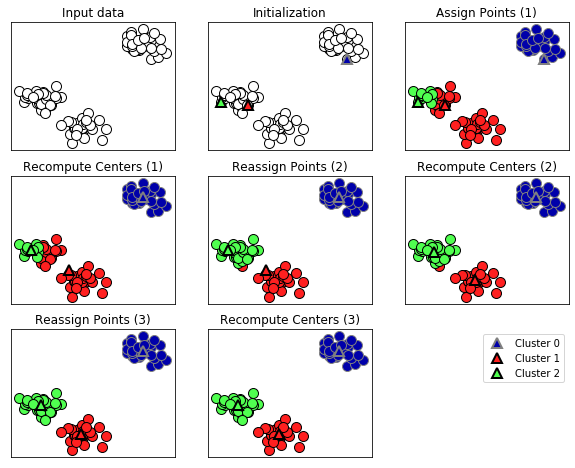

In [49]:
mglearn.plots.plot_kmeans_algorithm()

클러스터 중심으로 삼을 데이터 포인트 3개를 무작위로 초기화했다.

먼저 각 데이터 포인트를 가장 가까운 클러스터 중심에 할당한다.

다음에 할당한 포인트의 평균값으로 클러스터 중심을 갱신한다.

새로운 데이터 포인트가 주어지면 k-means 알고리즘은 가장 가까운 클러스터 중심을 할당한다.

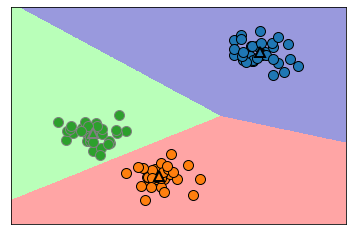

In [50]:
#클러스터 중심의 경계를 표현해보자
mglearn.plots.plot_kmeans_boundaries()

In [51]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(random_state = 1)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [52]:
#X에 담긴 각 훈련 데이터 포인트에 클러스터 레이블이 할당된다.
print('Cluster Label:\n{}'.format(kmeans.labels_))

Cluster Label:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [53]:
print(kmeans.predict(X))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


군집은 각 데이터 포인트가 레이블을 가진다는 면에서 분류와 조금 비슷해 보인다.

그러나 정답을 모르고 있으며 레이블 자체에 어떤 의미가 있지는 않다.

위의 예제 데이터에서 군집 알고리즘을 적용할 때 각 그룹에 할당된 레이블 번호는 중요하지 않다. 초기화를 무작위로 하기 때문에 알고리즘을 다시 실행하면 클러스터의 번호가 다르게 부여될 수 있다.

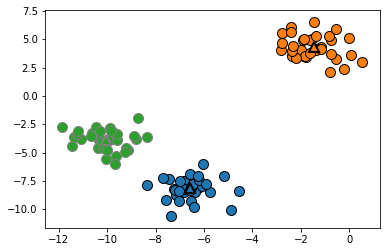

In [55]:
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],[0,1,2],
                        markers ='^', markeredgewidth=2)

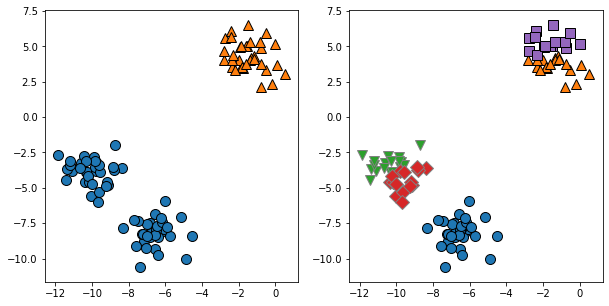

In [56]:
#클러스터 수를 바꿔보자.
fig,axes = plt.subplots(1,2, figsize=(10,5))

# 두 개의 클러스터 중심
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:,0], X[:,1], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:,0], X[:,1], assignments, ax=axes[1])

데이터셋의 클러스터 개수를 정확하게 알고 있더라도 k-means 알고리즘이 항상 이를 구분해낼 수 있는 것은 아니다.

각 클러스터를 정의하는 것이 중심 하나뿐이므로 클러스터는 둥근 형태로 나타난다. 이런 이유로 k-means 알고리즘은 비교적 간단한 형태를 구분할 수 있다.

또한 k-means는 모든 클러스터의 반경이 똑같다고 가정한다. 그래서 클러스터 중심 사이의 정확히 중간에 경계를 그린다.

Text(0, 0.5, 'Feature 1')

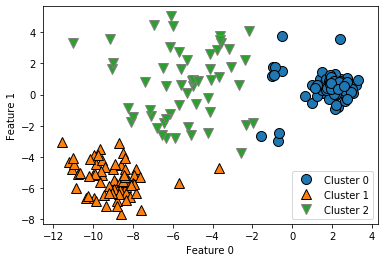

In [57]:
#예상치 않은 결과 보기
X_varied, y_varied = make_blobs(n_samples=200, cluster_std = [1.0,2.5,0.5], random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:,0], X_varied[:,1], y_pred)
plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'], loc='best')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

# 클러스터의 밀도가 다를때 k-means로 찾은 클러스터 할당

클러스터 0과 1은 클러스터 중심에서 멀리 떨어진 포인트들도 포함하고 있다. 

k-means는 클러스터에서 모든 방향이 똑같이 중요하다고 가정한다.

Text(0, 0.5, 'Feature 1')

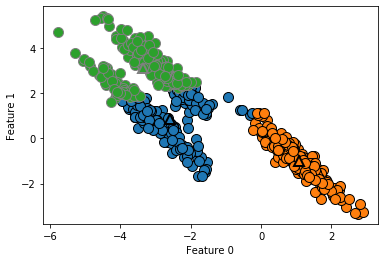

In [60]:
#무작위로 클러스터 데이터 생성
X, y = make_blobs(random_state=170, n_samples = 600)
rng = np.random.RandomState(74)

#데이터가 길게 늘어지도록 변경
transformation = rng.normal(size=(2,2))
X = np.dot(X, transformation)

#세 개의 클러스터로 데이터에 KMeans 알고리즘을 적용한다.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

#클러스터 할당과 클러스터 중심 나타내기
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0,1,2],
                        markers = '^', markeredgewidth = 2)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

#원형이 아닌 클러스터를 구분하지 못하는 모습을 볼 수 있다.

Text(0, 0.5, 'Feature 1')

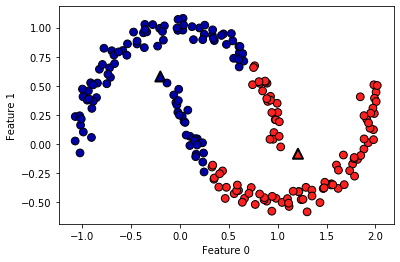

In [62]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred, cmap = mglearn.cm2, s=60, edgecolors ='k')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker= '^', 
            c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth = 2, edgecolors='k' )
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

## 벡터 양자화 또는 분해 메서드로서의 k-means
k-means이 군집 알고리즘이지만, PCA나 NMF 같은 분해 알고리즘과 유사점이 있다.

PCA는 데이터에서 분산이 가장 큰 방향을 찾으려 하고, NMF는 데이터의 극단 또는 일부분에 상응되는 중첩할 수 있는 성분을 찾는다.

두 방법 모두 데이터 포인트를 어떤 성분의 합으로 표현한다.

반면에 k-means는 클러스터 중심으로 각 데이터 포인트를 표현한다.

이를 각 데이터 포인트가 클러스터 중심, 즉 하나의 성분으로 표현된다고 볼 수 있다.

k-means를 이렇게 각 포인트가 하나의 성분으로 분해되는 관점으로 보는 것을 '벡터 양자화(vector quantization)'라고 한다.

k-means를 사용한 벡터 양자화이 흥미로운 면은 입력 데이터의 차원보다 더 많은 클러스터를 사용해 데이터를 인코딩할 수 있다는 점이다.

two-moons 데이터에서 이 데이터는 2차원이므로 PCA나 NMF를 사용해 1차원으로 축소하면 데이터 구조가 완전히 파괴되기 때문에 할 수 있는 것이 많지 않다.

하지만 많은 클러스터 중심을 사용한 k-means는 데이터를 더 잘 표현할 수 있다.

Cluster Lable:
 [9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


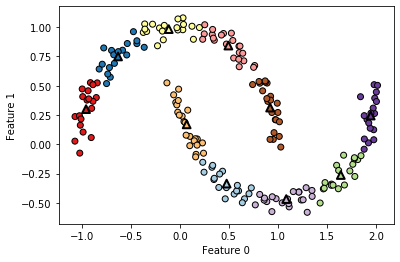

In [63]:
X,y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred, cmap = 'Paired', edgecolors ='black')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker= '^', 
            c=range(kmeans.n_clusters), s=60, linewidth = 2, edgecolors='black', cmap = 'Paired')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
print('Cluster Lable:\n', y_pred)